<a href="https://colab.research.google.com/github/meriselleb/JollibeeNotebook/blob/master/JollibeeNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meriselle Ruotolo: Jollibee Machine Learning Notebook


**Abstract Requirements:**
+ Talk about what datasets you've selected for your notebook
+ Include why you choose these datasets
+ Talk about the classification algorithm you plan to use
+ Mention what you hope to find over the course of this notebook

# Abstract  
#### Dataset for Linear Regression:
The first dataset I have selected is the Honey Production in the USA (1998-2012) dataset. 

Why I chose this dataset? I simply thought it was an interesting dataset. The bee population, from what I know from word of mouth, has decreased over the years. I say word of mouth because I did hear it from other people, but I never looked into the statistics to confirm. So, it would be interesting to see how much it has decreased every year and what effect it has on honey prices and honey production. It would also be cool to see with the linear regression model, how the amount of bee colonies and honey production was predicted to continue to decrease. If you notice, this dataset is from 1998 to 2012. I believe it was around middle school where I first learned about how the bee population was drastically decreasing and how we needed to put more effort into reviving it. So, with the data being only up to 2012, it is actually more interesting this way since we could use the linear regression model to see where the bee population, honey production, and honey prices would've been/continued to go if not for the campaigns to help revive bee colonies. (as to my knowledge, the bee population has been making a comeback as of late) 


#### Dataset for Classification:
The second dataset I have selected is the Titanic dataset. It has information of all the passengers on the Titanic. I chose this dataset because, full disclosure, I have used this dataset before in a previous class (a different version of this dataset). However, I previously used the alternative version of this dataset only for logistic regression. I think it's a really good dataset for classification. This time around, I want to try more EDA, data cleaning methods I didn't use before, and different machine learning algorithms than what I used last time.

#### The Classification Algorithm I will be using: SVM
I want to use SVM this time around, and also potentially K-Nearest Neighbors, because I just want to see how accurate it could be with real life data. SVM is a common go-to model to start off with. For K-Nearest Neighbors, I've never used it before but it sounds pretty interesting, so I would like to try.
I hope to find a relatively accurate model and hopefully, get to practice some different data cleaning techniques and see how useful they are in creating a more accurate model.

#### What do I hope to find. 
For the linear regression, I hope to accurately predict the price per lb of honey and the total production of honey for a given set of selected features that I will pick out after doing an EDA of the dataset. I hope to get a relatively accurate model since it seems that the data does have clear trends. I hope this along with the data analysis will help me better understand how the amount of honey produced in the U.S. has changed over the years and was predicted to change up to 2012. 

For the Titanic Dataset, I hope to train models that are able to accurately predict whether a passenger would survive or not survive based on a given set of selected features I again will pick out after doing an Exploratory Data Analysis of the dataset. Since this is a popular dataset, I assume I will be able to produce some accurate models. 


In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np
# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC

# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 


## Section 1: Prepping the Regression datasets
**Requirements:**
+ At a high level, discuss what columns are included in the data
+ Load the dataset you've selected using pandas
+ Show the **"head"** of the data
+ For the columns you will be using in your regression, describe their setup in more detail
+ Clean the data if needed using pandas


#### At High Level:
The following columns are included in this dataset: 
- state: the state in which the row of data is collected for
- numcol: number of colonies
- yieldpercol: the amount of honey per colony (average)
- totalprod: the total amount of honey produced in that state (for that year)
- stocks: refers to stocks held by producers (in lbs)
- priceperlb: the price of honey per pound (average)
- production value: value of production (totalprod x priceperlb)
- year: the year for which the data is for

In [2]:
df = pd.read_csv('honeyproduction.csv') # loading the data
df.head(15)                             # showing the first 15 rows

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


Not sure what columns to use yet, but will do a mini EDA to determine what columns would be most useful.

In [3]:
df.describe() # just general statistics of the data

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In terms of cleaning, I'll check for duplicate and null data.

In [4]:
df.duplicated().sum() # checking for total amount of duplicate rows


0

In [5]:
df.isnull().sum()   # checking sum of nulls


state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

The data seems cleaned already, so, we're good!

### Exploratory Data Analysis
Because I am not sure what columns will be useful yet, I am going to do some EDA to find what columns would show the most potential for Linear Regression. 


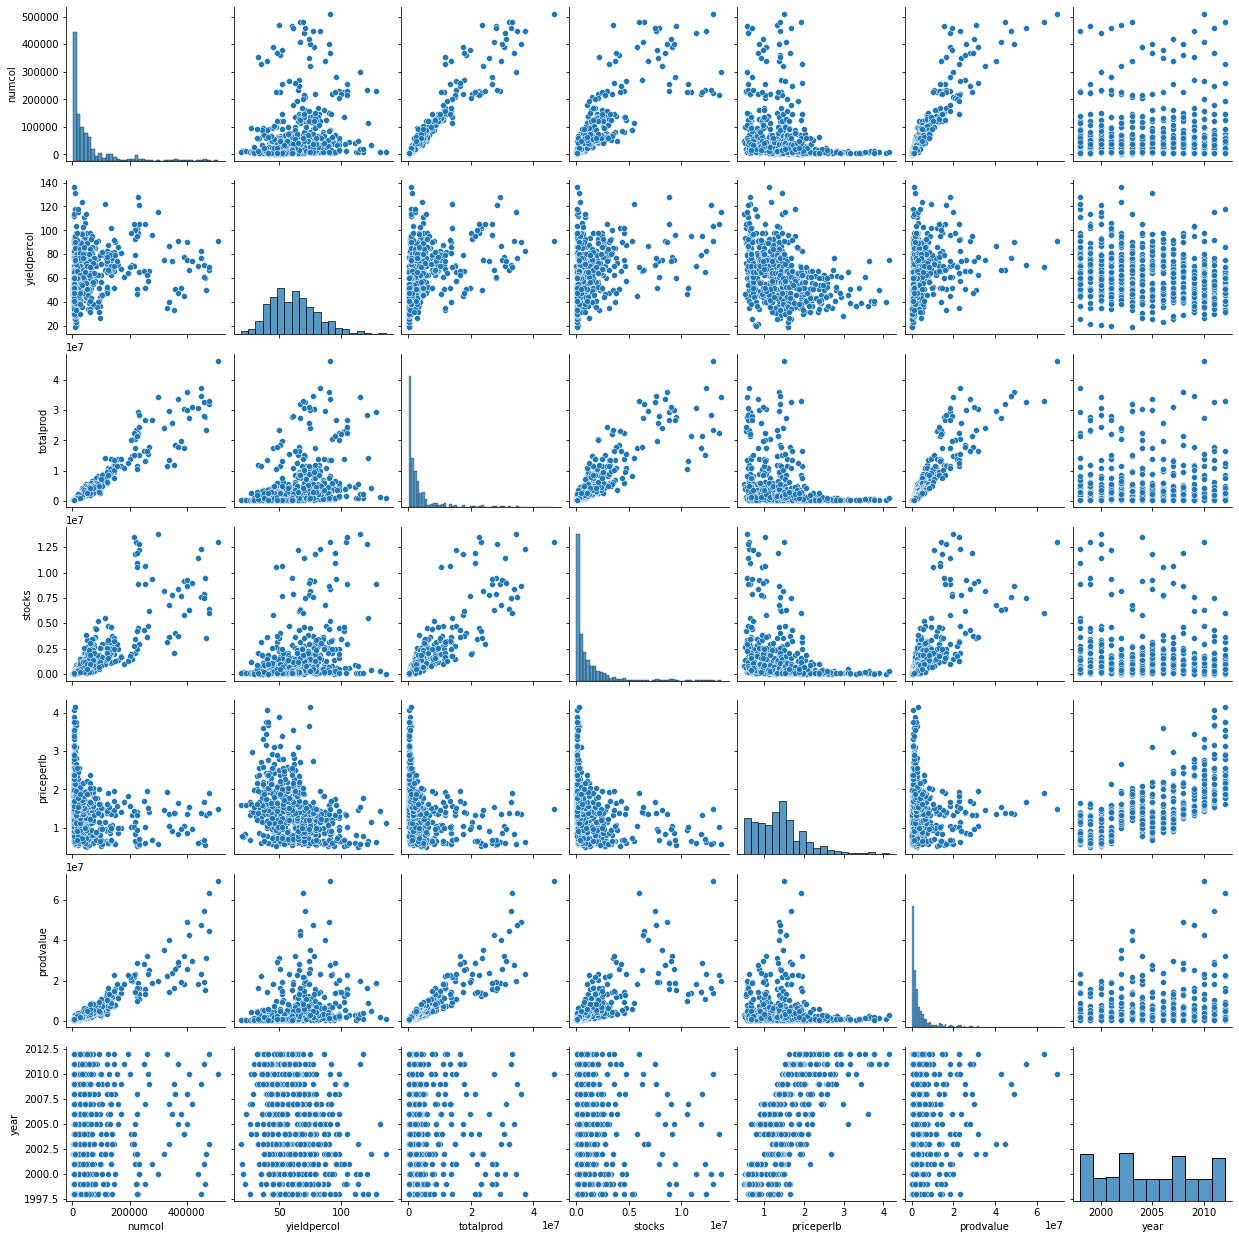

In [6]:
sns.pairplot(data = df)    # this is plotting scatter plots for every pair of features
# this is to show the potential linear relationships between features to help me decide which features would be most
# promising to use in my linear regression


#### I think I will try to handle the data by year for the EDA. Since I want to make predictions and analysis of the honey production, price, etc overall in the US, I don't really want the data by state. So, I will group by year to compile all the state by state data. However, since this is only from 1998-2012, I will later use the data not grouped by year to ensure I have enough data points to train my model.

In [7]:
df_by_year = df.groupby('year').mean().reset_index() # this is grouping the dataset by year, thus combining all the state data
df_by_year.head(10)


,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,1998,60953.488372,69.953488,5.105093e+06,1.873605e+06,0.832558,3.397465e+06
1,1999,61325.581395,65.465116,4.706674e+06,1.823023e+06,0.804186,2.875744e+06
2,2000,60558.139535,67.581395,5.106000e+06,1.975721e+06,0.791395,3.059721e+06
3,2001,57772.727273,64.545455,4.221545e+06,1.471909e+06,0.911818,3.006409e+06
4,2002,58295.454545,66.795455,3.892386e+06,8.903864e+05,1.371364,5.165955e+06
5,2003,58886.363636,62.545455,4.122091e+06,9.231591e+05,1.494773,5.729068e+06
6,2004,61926.829268,64.804878,4.456805e+06,1.487341e+06,1.284634,4.812366e+06
7,2005,58390.243902,64.268293,4.243146e+06,1.516756e+06,1.195122,3.921780e+06
8,2006,58000.000000,61.853659,3.761902e+06,1.469146e+06,1.303659,3.851805e+06
9,2007,59219.512195,59.170732,3.600512e+06,1.278171e+06,1.438293,3.935512e+06


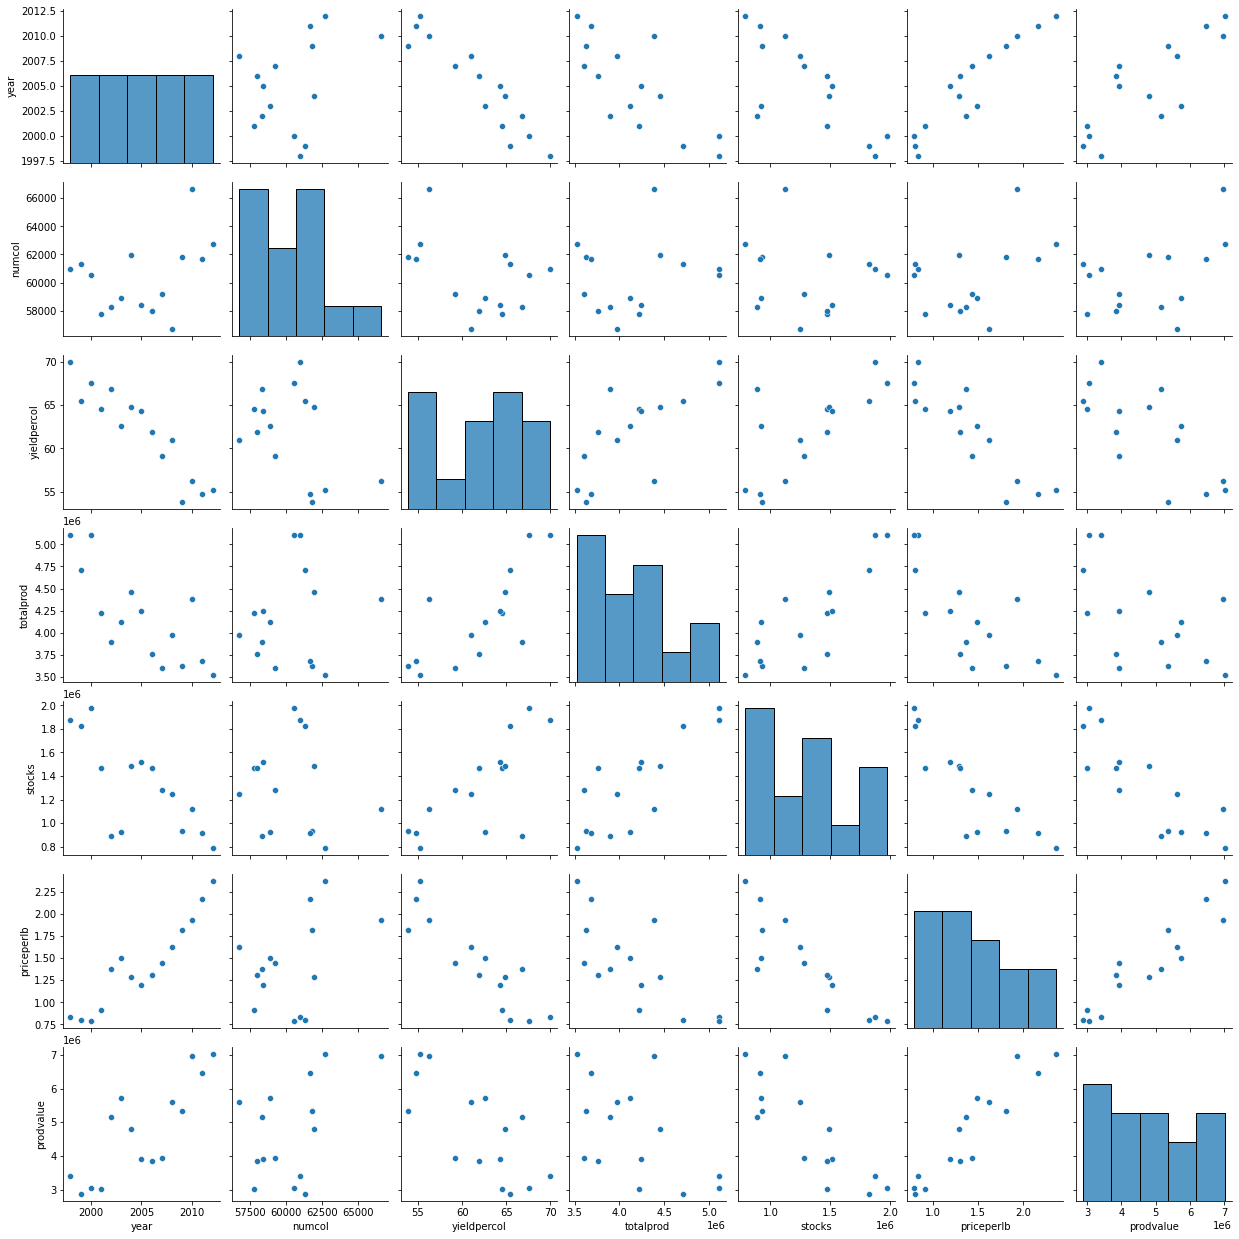

In [8]:
sns.pairplot(data=df_by_year)
# doing the scatterplot for each pair of features again
# but this time with the dataset grouped by year, so i can see more clearly overall relationship between features 


Next, I want to plot the linear relationship of each feature between total production. Even though you can see all the scatter plots for each possible relationship above, I just want a more clear visual of the linear relationships for each against total production specifically in the form of a line. 
I also want to do this for priceperlb. Then, depending on the linear relationships, I will decide whether to go for linear regression with respect to priceperlb or totalprod. 

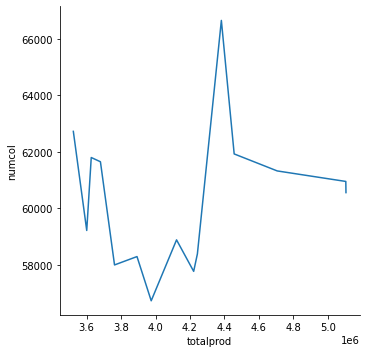

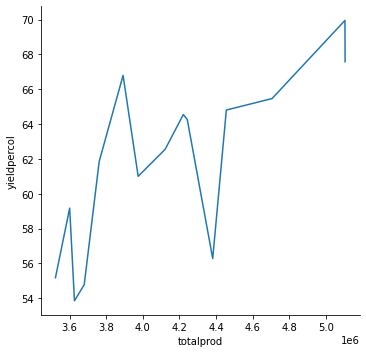

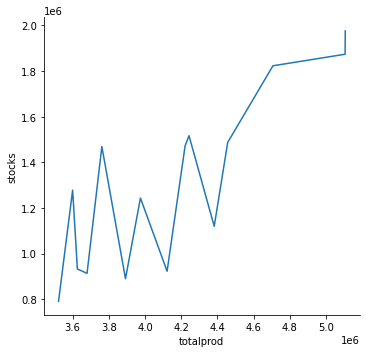

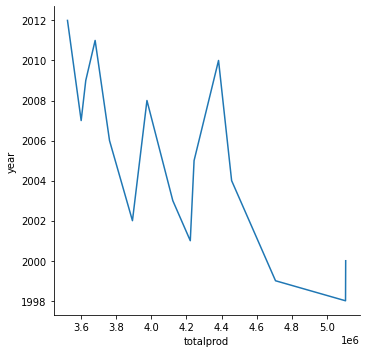

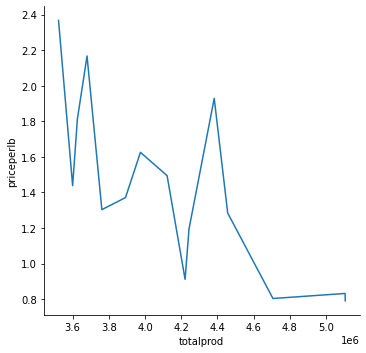

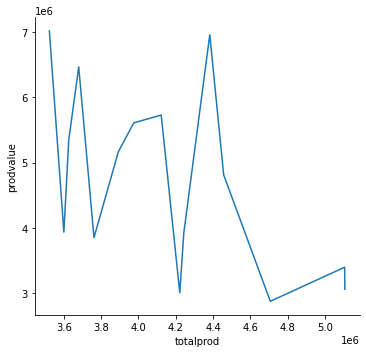

In [9]:
all_features_total_production = ['numcol', 'yieldpercol', 'stocks', 'year',
               'priceperlb', 'prodvalue']

# total production plots
for feature in all_features_total_production:
    sns.relplot(data = df_by_year, y = feature, x = 'totalprod', kind = 'line', height = 5, aspect = 1)
    

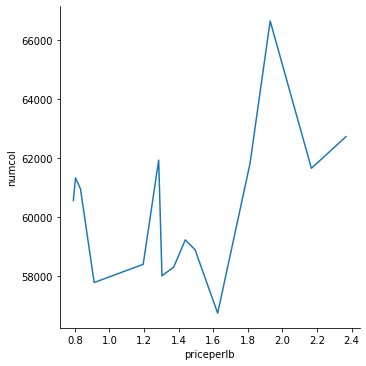

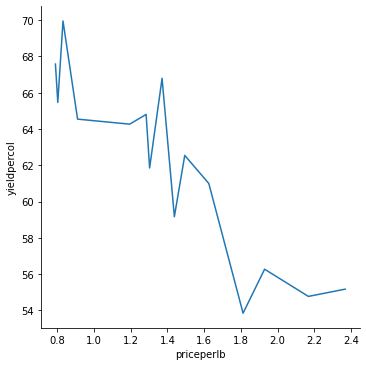

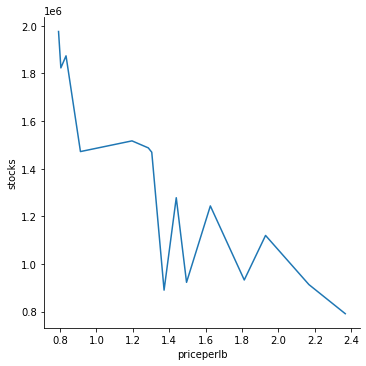

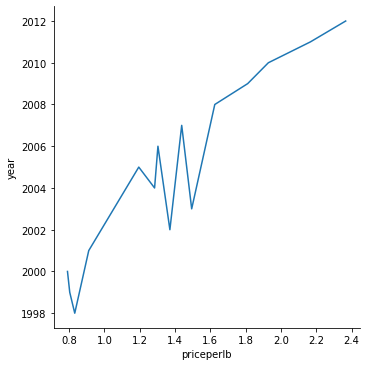

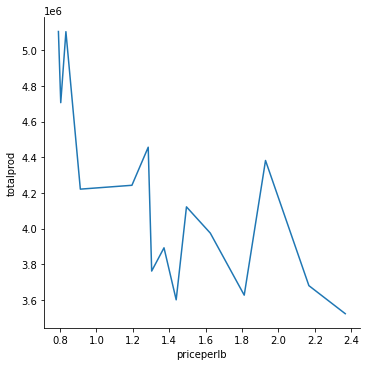

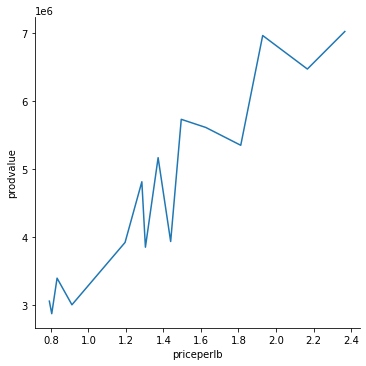

In [10]:
all_features_priceperlb = ['numcol', 'yieldpercol', 'stocks', 'year', 'totalprod', 'prodvalue']

for feature in all_features_priceperlb:
    sns.relplot(data = df_by_year, y = feature, x = 'priceperlb', kind = 'line', height = 5, aspect = 1)


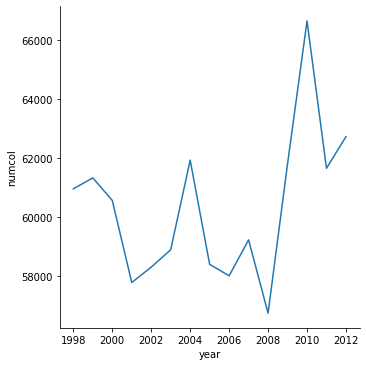

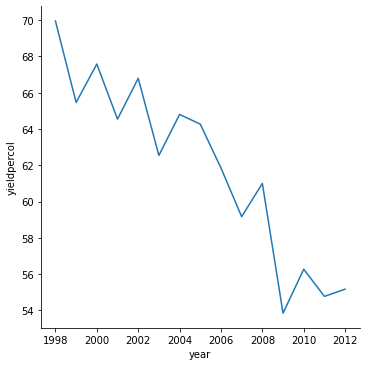

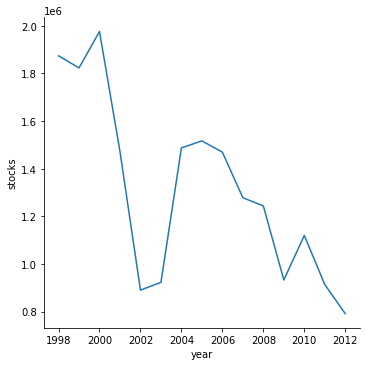

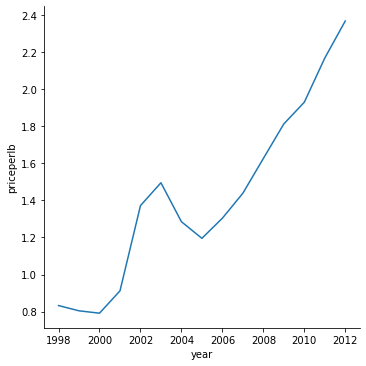

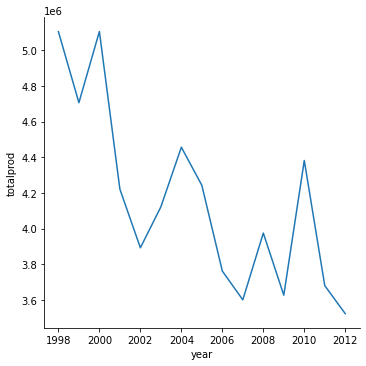

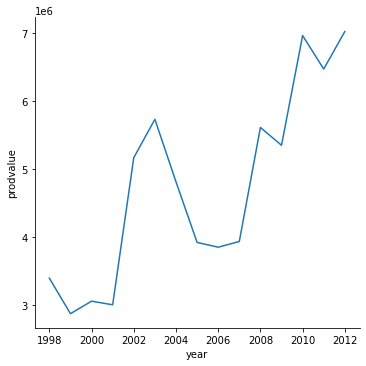

In [11]:
all_features_year = ['numcol', 'yieldpercol', 'stocks', 'priceperlb', 'totalprod', 'prodvalue']

for feature in all_features_year:
    sns.relplot(data = df_by_year, y = feature, x = 'year', kind = 'line', height = 5, aspect = 1)


##### After checking linear relationships of columns with priceperlb, totalprod, and year:
So, it seems that number of colonies doesn't really effect both the price per lb or the total production very much. The relationship is not very linear. So, I will leave that out. I will also leave out production value as it includes priceperlb in its calculations.

I also plotted the linear relationships between the features against the year, and found a surprising discovery. The number of bee colonies does not seem to have a very strong linear relationship with the year, surprisingly. However, it seems the amount of honey yielded per colony is decreasing drastically as the years continue on. I personally found that very interesting, so I thought I'd mention it here. So, while the number of colonies isn't necessarily decreasing, the amount of honey they yield is. This could be because the bees cannot produce as much, whether it is resources or otherwise, or that the size of the colonies may be decreasing as opposed to the number of colonies. The latter makes sense with previous news of the bee population declining. So, since the number of bee colonies does not have a strong negative correlation with the year, it may be that the amount of bees in colonies is decreasing, however, we do not have any counts of how many bees are in each colony in this dataset. 

#### The columns I will be using
So, after some exploratory data analysis, I have decided I will be using yieldpercol, stocks, totalprod, and year to predict priceperlb.
Then for predicting totalprod, I will be using yieldpercol, stocks, priceperlb, and year.
Since I found two interesting variables I want to predict, priceperlb and totalprod, I will be doing two different linear regression models.

#### Describing these columns in more detail:
- yieldpercol: How much honey is yielded per bee colony on average
- stocks: How much stocks or 'reserves' of honey is already in stock
- priceperlb: The price of honey per lb
- year: The year
- totalprod: The total amount of honey produced

## Section 2: Linear Regression
**Requirements:**
+ Split your cleaned dataset using sklearn into a training and test set
+ Fit a linear regression to your training set
+ Visualize the regressor using matplotlib
+ Report on the error rate for your test set
+ Comment on the result of this regression. Did it work well or not? Provide justification why or why not.

First let's grab some subsets of our data to use for features.

#### Note: When I do my model training, I am using the dataset that is NOT grouped by year. This is because, otherwise, I would not have enough datapoints to train the model. This allows me to have the 500 datapoints to train my model. I only grouped the data set by year for my exploratory analysis because I wanted to be able to see the overall data and their relationships to help me decide what features are best to use for training my model.

#### Another Note:  I will be training TWO different linear regressions models: one in respect to price per lb and one in respect to total production of honey.

## Price per lb Linear Regression

In [12]:
# Use pandas to extract features and prediction sets from our dataframe
selected_features = ['yieldpercol', 'stocks', 'totalprod', 'year']
target = ['priceperlb']
X = df[selected_features].values
y = df[target].values


I will reserve 20% of the dataset for testing.

In [13]:
# Use sklearn to split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


Let's use that training set and fit a Linear Regression to it:

In [14]:
# Use sklearn to create and Linear Regressor and fit our data to it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Note on Plots:
Since I am using multiple features in my linear regression model, plotting is a little difficult. So, instead of a single plot, I am going to plot each feature against the predicted y (predicted priceperlb) and actual y, so we can see the relationship. The green will be the predicted price per lb and the blue will be the actual y, price per lb. 

In [15]:
y_pred = model.predict(X_test) #predicing the priceperlb based on X_test features values


 Blue: Actual Price Per lb 
 Green: Predicted Price Per lb


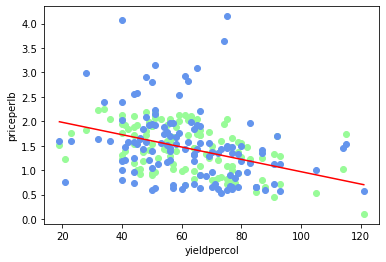

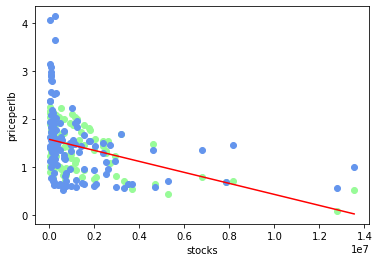

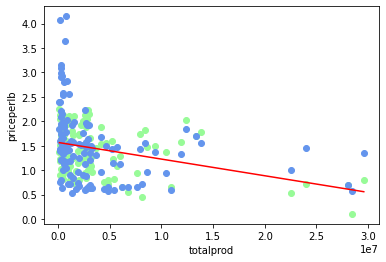

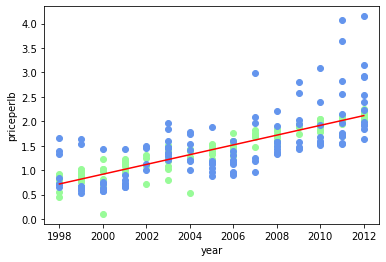

In [16]:
print('\n','Blue: Actual Price Per lb','\n', 'Green: Predicted Price Per lb')
labels = ['yieldpercol', 'stocks', 'totalprod', 'year']

import math

for x in range(4):
    plt.scatter(X_test[:,x], y_pred, color = 'palegreen')
    plt.ylabel('priceperlb')
    plt.scatter(X_test[:,x], y_test, color = 'cornflowerblue')
    plt.xlabel(labels[x])
    
    temp_model = LinearRegression()
    temp_model.fit([[i] for i in X_test[:,x]], y_pred)
    
    rangeMin = np.min(X_test[:, x])
    rangeMax = np.max(X_test[:, x])
    
    numbers = np.linspace(math.floor(rangeMin), math.ceil(rangeMax))
    y = numbers * temp_model.coef_[0][0] + temp_model.intercept_[0]
    plt.plot(numbers, y, color = 'red')
    
    plt.show()
    

In [17]:
model.score(X_test, y_test) # this gets the r-squared score

0.5298838675698394

In [18]:
# Use linear regression model to report accuracy/error rate on the test set
honeyprice_r_squared = metrics.r2_score(y_test, y_pred) # this also gets the r-squared score
print('R-Squared Score:', honeyprice_r_squared)

honeyprice_mae = metrics.mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Error:", honeyprice_mae)



R-Squared Score: 0.5298838675698394
Mean Absolute Error: 0.26617141974673564


### Analysis of Results: Price per lb Linear Regression Model
So, my R-Squared score is 53%. Which is not horrible for a real life dataset. It is a moderate score. I would say it is decent considering how many outside factors also could contribute to the price per lb. So, one cannot complain at this score! 

## Total Production Linear Regression

In [19]:
selected_features2 = ['yieldpercol', 'stocks', 'year', 'priceperlb']
target2 = ['totalprod']
X2 = df[selected_features2].values
y2 = df[target2].values
# since I already did this in the previous lin reg model, I won't comment each cell on what I did

In [20]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

In [21]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [22]:
y2_pred = model2.predict(X2_test)


 Blue: Actual Total Production 
 Green: Predicted Total Production


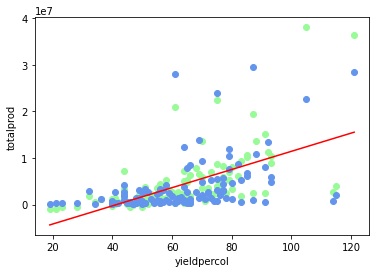

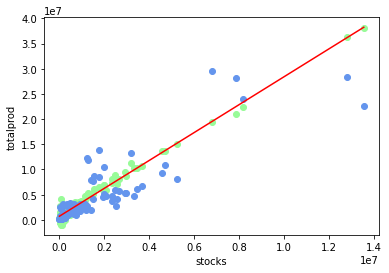

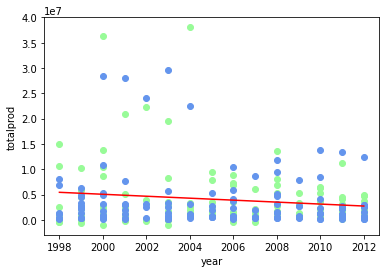

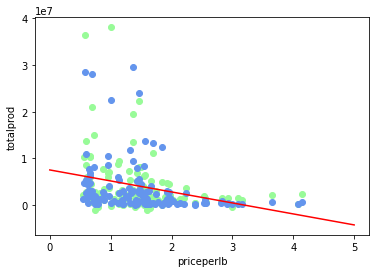

In [23]:
print('\n','Blue: Actual Total Production','\n', 'Green: Predicted Total Production')
labels2 = ['yieldpercol', 'stocks', 'year', 'priceperlb']
for x in range(4):
    plt.scatter(X2_test[:,x], y2_pred, color = 'palegreen')
    plt.ylabel('totalprod')
    plt.scatter(X2_test[:,x], y2_test, color = 'cornflowerblue')
    plt.xlabel(labels2[x])
    
    temp_model = LinearRegression()
    temp_model.fit([[i] for i in X2_test[:,x]], y2_pred)
    
    rangeMin = np.min(X2_test[:, x])
    rangeMax = np.max(X2_test[:, x])
    
    numbers = np.linspace(math.floor(rangeMin), math.ceil(rangeMax), 10)
    y = numbers * temp_model.coef_[0][0] + temp_model.intercept_[0]
    plt.plot(numbers, y, color = 'red')
    
    plt.show()

In [24]:
honey_rsquared = model2.score(X2_test, y2_test)

In [25]:
r_squared = metrics.r2_score(y2_test, y2_pred)
print('R-Squared Score:', r_squared)

honey_mae = metrics.mean_absolute_percentage_error(y2_test, y2_pred)
print("Mean Absolute Error:", honey_mae)

R-Squared Score: 0.7436699852530257
Mean Absolute Error: 1.083660844789377


### Analysis of the Results: Total Production Linear Regression Model
So, with an R-Squared score of 74.37%, I would say this is a pretty good model. Again, we have to realize that this dataset is real life data of the total honey production, and that these factors alone are not the only things potentially effecting the total production of honey. So, with that said, I would say it's a pretty decent model. The Mean Absolute Error of 1.08 also confirms that.


## Section 3: Prepping the classification dataset
**Requirements:**
+ At a high level, discuss what columns are included in the data
+ Load the dataset you've selected using pandas
+ Show the **head** of the data
+ **For the columns you will be using in your classification, describe the range of values**
+ For those columns map the values to a set of integers (if they aren't already)
+ Clean the data using pandas if needed


#### At High Level, the columns are as follows:
- Passengerid: Just the index for the data, not necessary
- Age: Age of Passenger
- Fare: The fare they paid for their ticket
- Sex: Gender 
- Zero columns: Data was originally prepped for binary logistic regression and Hot-On_Encoding, thus creater added many zero columns
- Sibsp: Amount of Siblings / Spouses aboard with them
- Parch: # of parents/ children
- Pclass: Ticket Class
- Embarked: Where they boarded the ship: 0 = Cherbourg, 1 = Queenstown, 2 = Southamptom
- Survived: Whether they survived or not

Before I do my exploratory data analysis and decide the features I will be using, I will first clean the data.

In [26]:
df_titanic = pd.read_csv('train_and_test2.csv')
df_titanic.head(15)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,1


In [27]:
df_titanic.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


This Titanic Dataset requires a lot of data cleaning as there is a good amount of missing data and unnecessary data. So, first, we will do some data cleaning and then some exploratory data analysis.

#### Data Cleaning
1. Cleaning Columns
2. Check for null values
3. Check for duplicates 



In [28]:
df_titanic.info() # see all the columns and see which ones are not useful for us

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [29]:
# dropping all the zero columns
df_titanic.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10',
                 'zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'], axis=1, inplace=True)

In [30]:
# For some reason, 2urvived is the name of the Survived column.
df_titanic.rename(columns={'2urvived':'Survived'}, inplace=True)

In [31]:
# Checking for null values
df_titanic.isnull().sum()
# There are two in embarked, but we most likely won't use that one, 
# so I will just drop embarked as I am not planning on using it

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [32]:
df_titanic.drop(['Embarked'], axis=1, inplace=True)

In [33]:
df_titanic.isnull().sum() # double checking that Embarked was dropped

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Survived       0
dtype: int64

In [34]:
# Checking duplicates
df_titanic.duplicated().sum()

0

In [35]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Survived     1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


As you can see above, the remaining columns are all integer (or float) data types, and thus do not need to be mapped to a set of integer values. 

#### Exploratory Data Analysis
Now to visualize the data and try to see what features would be the best to use for classification

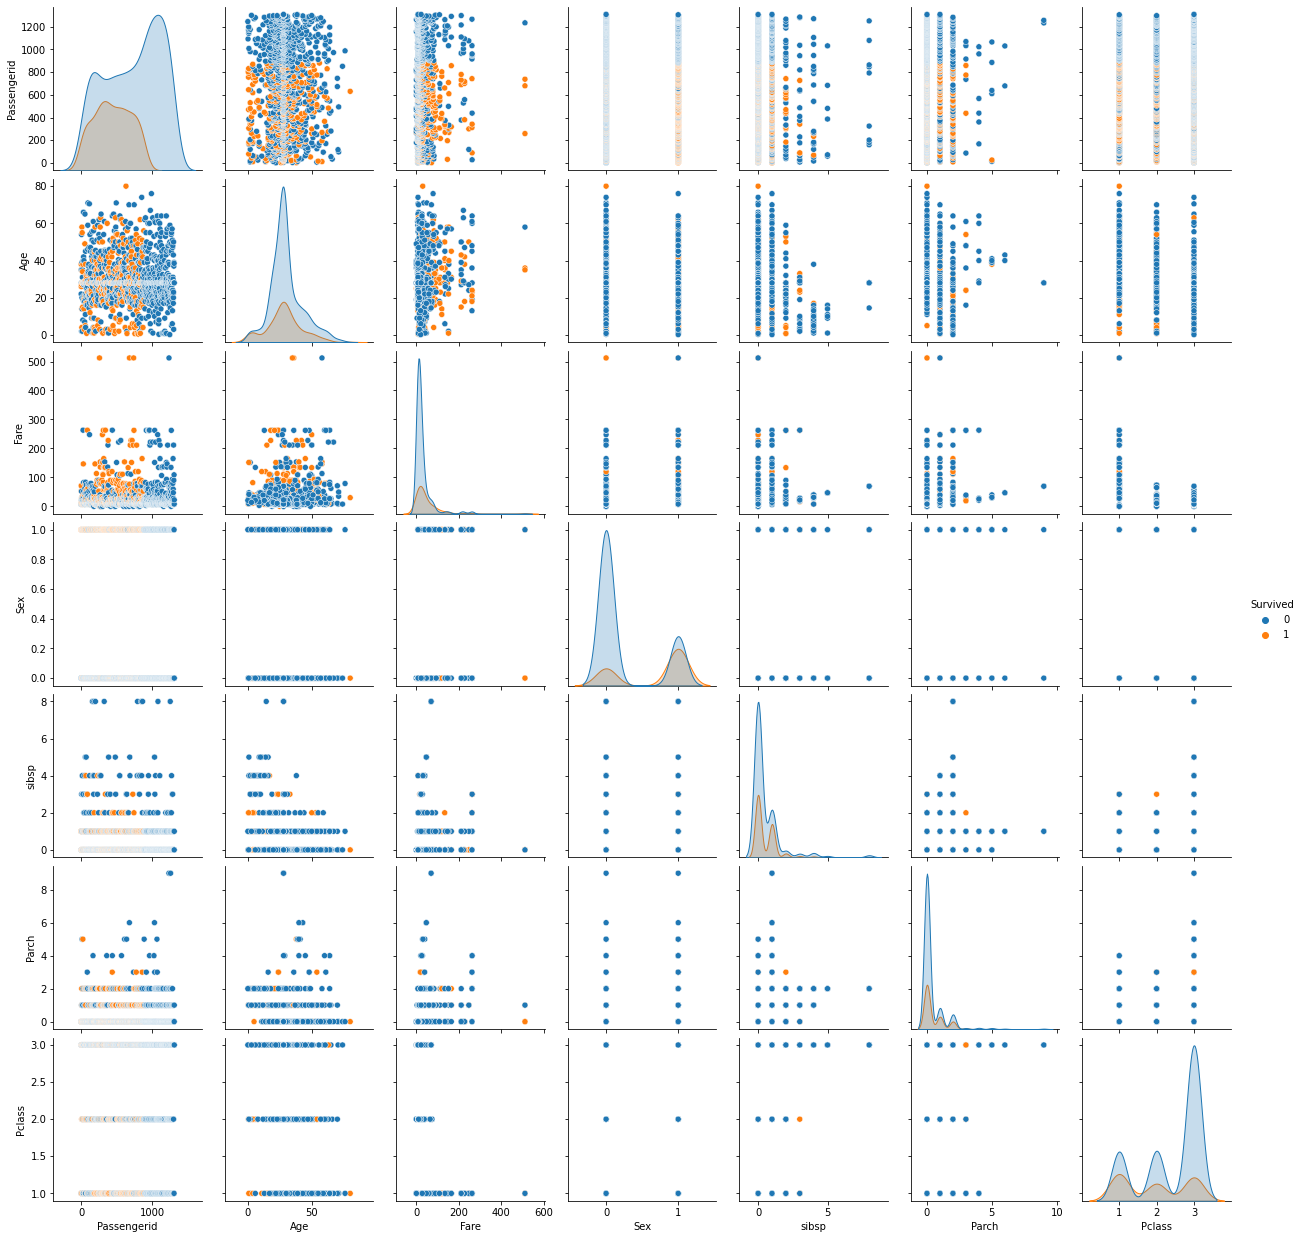

In [36]:
sns.pairplot(df_titanic, hue='Survived')

## Section 4: Classification with a Neural Network (or classifier of choice)
**Requirements:**
+ Split your cleaned dataset using sklearn into a training and test set
+ **(Situational)** Scale your data to prevent overfitting
+ Fit a classifier to your training set
+ **(Optional)** visualize the classifier on a data plot
+ Report on the error rate for your test set
+ Comment on the result of this regression. Did it work well or not? Provide justification why or why not.


In [37]:
titanic_features = ['Sex', 'Pclass', 'Fare','Age'] # selecting features I will use
X = df_titanic[titanic_features]
y = df_titanic['Survived'] # want to predict whether a passenger survived or not

In [38]:
# Use sklearn to split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [39]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

Once again let's analyze the accuracy of our machine learning. Here is the accuracy for the test set.

In [40]:
titanic_accuracy = accuracy_score(y_test, y_pred)
print(titanic_accuracy)

0.7977099236641222


true-negitive: 184 
false-positive: 17 
false-negative: 36 
true-positive: 25


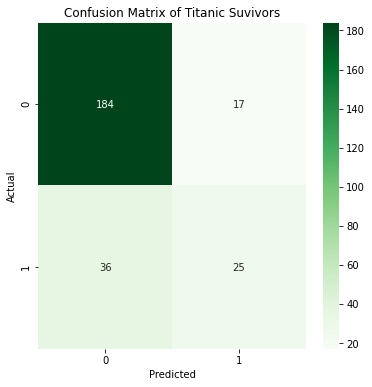

In [41]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fig = plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True,cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )


My SVM had an accuracy of 79.77% on the testing data. Which I would say is pretty good, almost 80%! While my SVM classifier is good at calculating true negatives, it is not very good at dealing with true positives, from the confusion matrix. However, we must remember that a large majority of passengers did die in the Titanic, the amount of data that has 'Survived' as 1 is much smaller than for those who didn't '0'. So, in comparison, there is not as much to work with. So, I would say with the data given, it worked pretty well. In some situations, as discussed in class, having a high true negative rate/low false negative rate would be more important than a high true positive rate.

### Another Classifier: K-Nearest Neighbors

In [42]:
KN=KNeighborsClassifier(n_neighbors=6)
KN.fit(X_train,y_train)
yhat=KN.predict(X_test)

In [43]:
k_rsquared = accuracy_score(yhat,y_test)
print(k_rsquared)

0.7557251908396947


#### For K-Nearest Neighbors
This is only slightly less accurate than the SVM. Considering how SVM is normally a pretty good model to work with in binary classification and considering how our dataset does not have an even distribution between survived and not survived, this is a pretty decent accuracy.

## Conclusions
**Requirements:**
+ Summarize the findings of your report
+ Repeat your methodology and key findings for Section 2. and Section 4.
+ Highlight what you found interesting
+ Discuss what you would do to extend the project further


# Summary of Report



 LINEAR REGRESSION:
TOTAL HONEY PRODUCTION:
R-Squared Score:  0.7436699852530257
Mean Absolute Error:  1.083660844789377

 PRICE OF HONEY PER LB:
R-Squared Score:  0.5298838675698394
Mean Absolute Error:  0.26617141974673564

 CLASSIFICATION K-NEAREST NEIGHBORS:
R-Squared Score:  0.7557251908396947

 CLASSIFICATION SVM CONFUSION MATRIX:
true-negitive: 184 
false-positive: 17 
false-negative: 36 
true-positive: 25


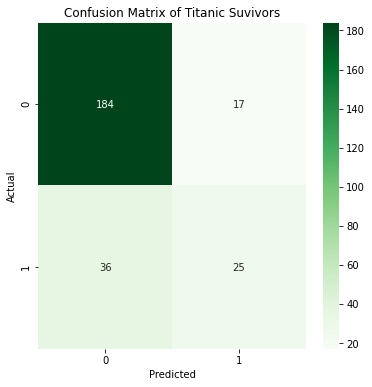

In [44]:
print('\n', 'LINEAR REGRESSION:')
print('TOTAL HONEY PRODUCTION:')
print('R-Squared Score: ', honey_rsquared)
print('Mean Absolute Error: ', honey_mae)
print('\n', 'PRICE OF HONEY PER LB:')
print('R-Squared Score: ', honeyprice_r_squared)
print('Mean Absolute Error: ', honeyprice_mae)

print('\n', 'CLASSIFICATION K-NEAREST NEIGHBORS:')
print('R-Squared Score: ', k_rsquared)
print('\n', 'CLASSIFICATION SVM CONFUSION MATRIX:')
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fig = plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True,cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

## Methodology and Key Findings

### Section 2: Linear Regression
So, for Section 2, I did some exploratory data analysis on the honey production dataset by year to analysis the overall trends. I then used the original dataset that includes the information per state to create enough datapoints to properly train a model. I trained two linear regression models, one to predict price per lb of honey with the features of 'yieldpercol', 'stocks', 'totalprod', 'year'. The linear regression model for price per lb had a somewhat low r-squared score of 0.529. So, while I expected the linear regression model for price per lb to be relatively good, it fell short. 
For the linear regression model for total production, I used the features: 'yieldpercol', 'stocks', 'year', 'priceperlb'. For this model, r-squared score was 0.743, which was a much better model. This is a score I can expect for a real life dataset such as this. 

### Section 4: Classification
For Section 4, I prepped and cleaned the data by removing all the unncessary columns I knew I wouldn't need, then did a small EDA to see what features would be most useful in training my models. I ended up using the following features: 'Sex', 'Pclass', 'Fare','Age'.
For the K-Nearest Neighbors, I had an r-squared score of 0.7557. Which was a decent score I would say. 
For my SVM, the accuracy was 79.77. So, the SVM was more accurate than the K-nearest neighbors. The confusion matrix shows that the SVM had the most success with true negatives. So, both models had pretty decent accuracies.

## Interesting Findings

### Honey Production Dataset and Linear Regression Interesting Findings
During the Exploratory Analysis for the Honey Production dataset, as I stated earlier in the notebook, an interesting was how the numer of bee colonies in the U.S. overall does not necessarily have a negative or positive trend. However, the total amount of honey produced does. This means that despite the number of colonies not changing, the honey produced per colony is decreasing as years go by. There are many potential reasons behind this. Some ideas may be that the amount of bees per colony has been decreasing through the years, or that the amount of flowers that bees need to produce honey has decreased, thus the amount of honey each bee produces on average has decreased over the years, or other potential reasons. This would be something interesting to look into further as we don't have in our dataset the size of the colonies.

As expected, but interesting still, was that when plotting the linear regression model for priceperlb in respect to the year, you could clearly see that the price of honey was predicted to increase year by year. I predicted that the price per lb would have a positive correlatio with the year. However, the linear regression model for price per lb had a relatively low r-squared score. I was surprised as my initial expectation was, since the linear relationships between price per lb and the selected features were relatively distinct, that the model would be more accurate. However, that was not the case. I don't know too much about economics, but I do know the phrase "supply and demand" and how the demand can drastically change the price. So, maybe outside factors such as that also made it more difficult. 


### Titanic Dataset and Classification Models Interesting Findings
During the Exploratory Data Analysis, it showed that the amount of passengers that did not survive was much larger than the amount of passengers that did survive. This means there was an uneven distribution of data between the two possible results we are trying to classify, whether a passenger survives or not. In turn, it resulted in the SVM being much more accurate predicting true negatives than true positives. 


## How would I extend the project further
   For the Honey Production, the data is actually split state by state, however, I do the Exploratory Analysis on the overall trends by year for all the states combined. If I had more time, I would continue a more in depth EDA on the honey production with a state by state analysis to see how the honey production has been impacted in various states and also various regions. 
    I would also do more EDA and testing with features to see if I could improve the linear regression model for price per lb. I would see if maybe selecting different features, more features, or less features, would help increase the r-squared score. And, if even more time allowed, potentially break the linear regression models by region. As different regions in the U.S., due to regional climate, economy, and other factors, could have very different trends. 

For the Titanic dataset, there are actually several different versions of this dataset on kaggle. This is because there is a decent amount of data cleaning to be done to the original dataset. This particular data set was somewhat prepped, but in furthering this project, I would try to start from the original dataset. I would try various data cleaning methods as well as try various methods to approach the rows of data that had missing information. In the original dataset, as this information is very old and not all things were tracked properly, there were a lot of null values. Those with cheaper fares were more likely to have some missing information. For this particular dataset, the rows with null values in crucial columns were simply removed. However, this could potentially lead to slightly different results as the distribution of the null values throughout specific categories was not even. Looking through various notebooks using the original dataset, there were various methods used to substitute and fill in these null values. So, if i were to extend this further, I would also start from the original data set and try to find the best methods to fill in the missing information based on the data we do have. Some for example, if the age was missing, would take the average age for that person's gender and class, then use that as the person's age. 